In [3]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np

Load the data collected in query_nyt.ipynb.

In [4]:
data = pd.read_csv('data/all.csv')
data['keywords'] = data['keywords'].apply(literal_eval)
data['date'] = pd.to_datetime(data['date']) 
data

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf
0,THE DEAF AND DUMB WAITER.,1885-12-03,article,Archives,None,Archives,[],https://www.nytimes.com/1885/12/03/archives/th...,nyt://article/0074c23c-1ff6-5bc7-85d9-e56a5af3...,NaN,True,False,False,False,False,False,False,False
1,Chad Threatens to Expel Sudanese Refugees,2006-04-14,article,News,International,World,[],https://www.nytimes.com/2006/04/14/world/chad-...,nyt://article/00bb19d7-2ba6-5072-8e6b-3159730d...,By Marc Lacey,True,False,False,False,False,False,False,False
2,WELFARE HOTEL CHILDREN: TOMORROW'S POOR,1987-07-16,article,News,Metropolitan Desk,New York,"[Homeless Persons, HOTELS AND MOTELS, Children...",https://www.nytimes.com/1987/07/16/nyregion/we...,nyt://article/01670df3-ae07-5eb6-8862-7bd834bf...,By Lydia Chavez,True,False,False,False,False,False,False,False
3,Wal-Mart Says Oil Prices Held Down Profits for...,2005-08-16,article,News,Business,Business Day,[Company Reports],https://www.nytimes.com/2005/08/16/business/wa...,nyt://article/0175ac61-cc62-5cdc-923c-f5efb8ec...,By Roben Farzad,True,False,False,False,False,False,False,False
4,"A Space Force? The Idea May Have Merit, Some Say",2018-06-23,article,News,Washington,U.S.,"[Space and Astronomy, United States Defense an...",https://www.nytimes.com/2018/06/23/us/politics...,nyt://article/01b8b8a5-7d0c-592a-a283-a9ccd3d8...,By Helene Cooper,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17340,Your Money; Claiming a Pet As a Deduction,1981-03-28,article,News,Financial Desk,Business Day,"[ANIMALS, Taxation, Income Tax, Handicapped]",https://www.nytimes.com/1981/03/28/business/yo...,nyt://article/8aa2aceb-e543-5691-b4cc-572cfada...,By Elizabeth M. Fowler,False,False,False,True,False,False,False,True
17341,"Your Typical Crowded, Swinging, Silent Bar Scene",1994-10-30,article,News,The City Weekly Desk,New York,"[Deafness, Bars]",https://www.nytimes.com/1994/10/30/nyregion/ne...,nyt://article/1aab92b9-5b05-50b7-bf7a-2b8cef19...,By Jennifer Kingson Bloom,False,False,False,True,False,False,False,True
17342,"‘Fargo’ Recap: Dead Dogs, Spiders and Pestilence",2014-04-30,article,News,Culture,Arts,[],https://artsbeat.blogs.nytimes.com/2014/04/29/...,nyt://article/3a6161c6-023a-5968-a28e-0ea2ecb6...,By Kate Phillips,False,False,False,True,False,False,False,True
17343,‘Singing’ With Their Hands,2012-02-11,article,News,Styles,Fashion & Style,"[Video Recordings and Downloads, Music, Sign L...",https://www.nytimes.com/2012/02/12/fashion/sin...,nyt://article/0918d106-bd33-59fe-a100-cd3f9a23...,By Austin Considine,False,False,False,True,False,False,False,True


In [6]:
phrases = data.columns[10:].tolist()
phrases

['deaf_and_dumb',
 'deaf_mute',
 'fell_on_deaf_ears',
 'hearing_impaired',
 'tone_deaf',
 'deaf_as_a_post',
 'stone_deaf',
 'deaf']

## Graph phrase count over the years

Define functions

In [65]:
def generate_xy(df, phrase=None):
    if phrase and phrase in df.columns: #secnod condition allows us to query and title 'all' without it looking for a column
        df = df[df[phrase]]
    years = df.groupby(df['date'].dt.year).count().reindex(list(range(1852, 2021)), fill_value=0)
    x = years.index 
    y = years['headline']
    return x, y

Generate a graph for each phrase.

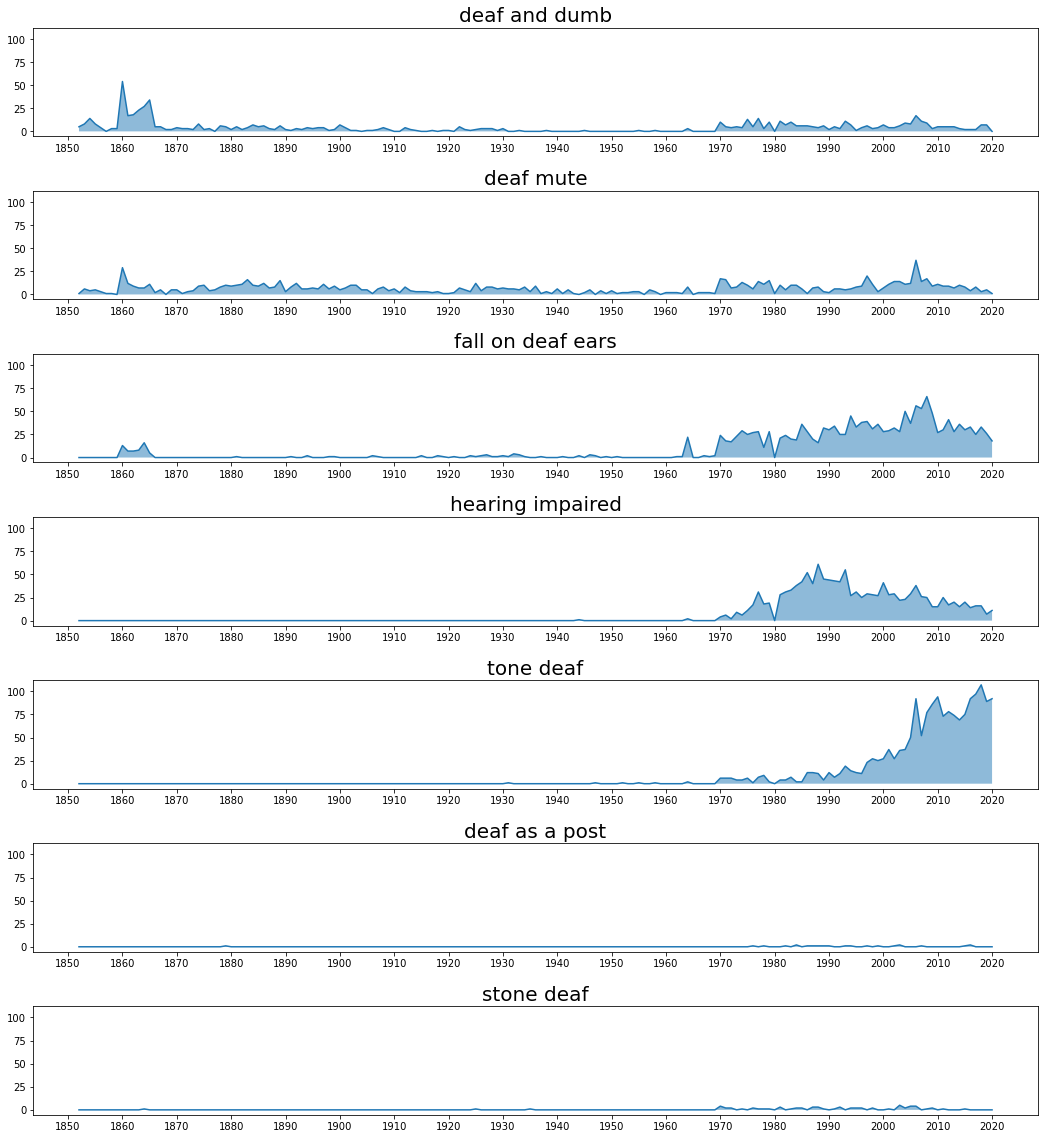

In [66]:
fig, axarr = plt.subplots(nrows=len(phrases)-1, ncols=1, figsize=(18, 20), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0)

for i, ax in enumerate(axarr.reshape(-1)):
    ax.set_title(phrases[i].replace('_', ' '), fontsize=20)
    x, y = generate_xy(data, phrases[i])
    ax.plot(x, y)
    ax.fill_between(x, y, alpha=0.5)
    ax.set_xticks(np.arange(1850, max(x)+1, 10))

plt.show()

I took out "deaf" from this because its y axis is much larger. It can be graphed alone.

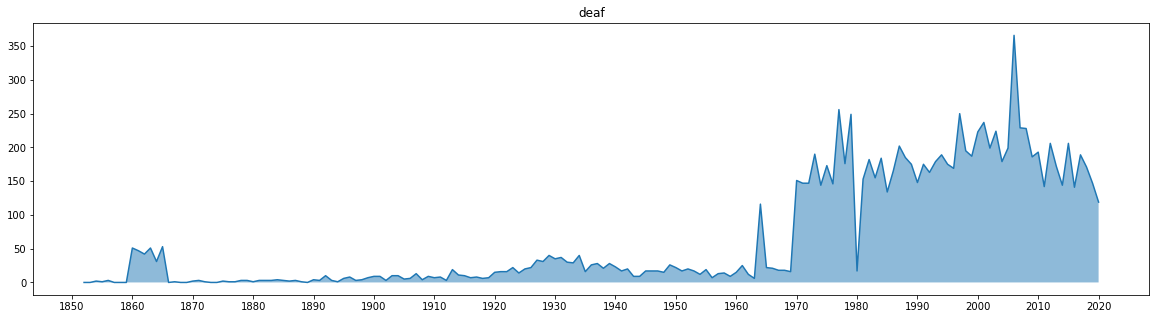

In [67]:
phrase = phrases[-1]
x, y = generate_xy(data, phrase)
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.5)
plt.title(phrase)
plt.xticks(np.arange(1850, max(x)+1, 10))
plt.show()

## Most common words in sentences or headlines that contain the phrases

## Most common keywords given to these articles 

## First & last articles for each phrase

In [13]:
for phrase in phrases:
    print('\nPhrase: ' + phrase)
    print('-----FIRST ARTICLE-----')
    phrase_subset = data[data[phrase]].sort_values('date', ascending=True)
    first_article = phrase_subset.iloc[0]
    print('Date: ' + str(first_article['date']))
    print('Headline: ' + first_article['headline'])
    
    print('-----LAST ARTICLE-----')
    last_article = phrase_subset.iloc[-1]
    print('Date: ' + str(last_article['date']))
    print('Headline: ' + last_article['headline'])


Phrase: deaf_and_dumb
-----FIRST ARTICLE-----
Date: 1852-05-14 00:00:00
Headline: Institution for the Deaf and Dumb.
-----LAST ARTICLE-----
Date: 2019-12-12 00:00:00
Headline: How ‘Survivor’ Failed Its #MeToo Test

Phrase: deaf_mute
-----FIRST ARTICLE-----
Date: 1852-09-29 00:00:00
Headline: DEAF MUTES.; The Statistics of the Class.
-----LAST ARTICLE-----
Date: 2020-01-16 00:00:00
Headline: Lorenza Mazzetti, Wartime Survivor and Seminal Filmmaker, Dies at 92

Phrase: fell_on_deaf_ears
-----FIRST ARTICLE-----
Date: 1860-01-13 00:00:00
Headline: Execution of Patrick Maude.; REMARKABLE SPEECH OF THE CRIMINAL UPON THE GALLOWS.
-----LAST ARTICLE-----
Date: 2020-09-08 00:00:00
Headline: As a University Spokesman, Can I Promote a Reopening Plan I Question?

Phrase: hearing_impaired
-----FIRST ARTICLE-----
Date: 1944-12-24 00:00:00
Headline: NOTES ON SCIENCE; New Resinous Coating Material -- Wide Hearing Impairment
-----LAST ARTICLE-----
Date: 2020-09-01 00:00:00
Headline: Face Shields and Va

## Sentiment analysis of sentences

Because sentiment analysis is still an emerging field, no single solution or approach has won the market yet. Chose to use SpaCy for this.